In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- 1. Import and Select Data ---
# Load the dataset
df = pd.read_csv("Housing.csv")
# Select only one feature: 'area' (X) to predict 'price' (y)
X = df[['area']]
y = df['price']

# --- 2. Split data into train-test sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# --- 3. Fit the Linear Regression model ---
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --- 4. Evaluate model using MAE, MSE, R^2 ---
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# --- 5. Interpret coefficient and Plotting ---
coefficient = model.coef_[0]
intercept = model.intercept_

Note: you may need to restart the kernel to use updated packages.
--- 1. Import and Preprocess the Dataset ---
Preprocessing complete. Features are ready.

--- 2. Split Data into Train-Test Sets ---
Training samples: 381
Testing samples: 164

--- 3. Fit a Linear Regression Model ---
Model has been trained successfully.

--- 4. Evaluate Model using MAE, MSE, R² ---
Mean Absolute Error (MAE): 920,392.94
Mean Squared Error (MSE): 1,523,019,469,501.29
R-squared (R²) Score: 0.6463
(Interpretation: The model explains 64.63% of the variance in the house prices.)

--- 5. Plot Regression Line and Interpret Coefficients ---

Model Coefficients (Interpretation):
Intercept: 95,784.23
Feature Coefficients:
|                                 | 0           |
|:--------------------------------|:------------|
| bathrooms                       | 1.11475e+06 |
| airconditioning                 | 685839      |
| hotwaterheating                 | 616375      |
| prefarea                        | 509192     


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\srees\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


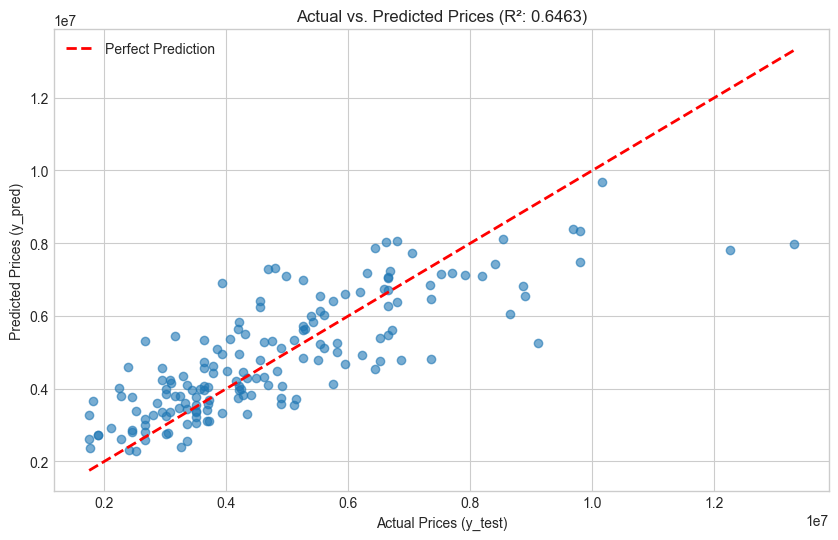

In [12]:
# Install optional dependency required by pandas.Series.to_markdown
%pip install -q tabulate

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set a style for plots for better visibility
plt.style.use('seaborn-v0_8-whitegrid')

print("--- 1. Import and Preprocess the Dataset ---")
# Load the dataset
df = pd.read_csv("Housing.csv")

# --- Preprocessing ---
# Map binary 'yes'/'no' columns to 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# Use One-Hot Encoding for 'furnishingstatus'
# drop_first=True helps avoid multicollinearity (dummy variable trap)
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

# Define our features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

print("Preprocessing complete. Features are ready.")


print("\n--- 2. Split Data into Train-Test Sets ---")
# Split the data: 70% for training, 30% for testing
# random_state=42 ensures we get the same split every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


print("\n--- 3. Fit a Linear Regression Model ---")
# Initialize the model
model = LinearRegression()

# Train (fit) the model on the training data
model.fit(X_train, y_train)

print("Model has been trained successfully.")


print("\n--- 4. Evaluate Model using MAE, MSE, R² ---")
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"R-squared (R²) Score: {r2:.4f}")
print(f"(Interpretation: The model explains {r2*100:.2f}% of the variance in the house prices.)")


print("\n--- 5. Plot Regression Line and Interpret Coefficients ---")

# --- Interpretation of Coefficients ---
print("\nModel Coefficients (Interpretation):")
print(f"Intercept: {model.intercept_:,.2f}")

# Create a Series to view coefficients with their feature names
coefficients = pd.Series(model.coef_, index=X.columns)
print("Feature Coefficients:")
# Print sorted coefficients for clarity
print(coefficients.sort_values(ascending=False).to_markdown(numalign="left", stralign="left"))

print("\nCoefficient Interpretation Example:")
print(f"A 1-unit increase in 'area' is associated with a ${coefficients['area']:,.2f} increase in price, holding all other features constant.")
print(f"A house with 'airconditioning' (1) is associated with a ${coefficients['airconditioning']:,.2f} higher price than one without (0), holding all other features constant.")


# --- Plotting ---
# For Multiple Linear Regression, we plot "Actual vs. Predicted"
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6) # Plot test vs predicted values
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction') # Diagonal line

plt.xlabel("Actual Prices (y_test)")
plt.ylabel("Predicted Prices (y_pred)")
plt.title(f"Actual vs. Predicted Prices (R²: {r2:.4f})")
plt.legend()


print("\nPlot 'actual_vs_predicted_prices.png' has been saved.")